In [1]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


# Natural Language Processing


Deal with text data - in the form of documents, web pages , social media , reviews 

Text data is unsupervised learning data whjich does not have a structure and do not have any independant & dependat variables

1. It requires pre- processing ( removal of puncuation, special characters , hypoer link , digits etc . )
2. After pre-processing the text data is converted to matrix of numbers - Vectorization.
                         - Vector embedding is also used to create matrix of numbers  
3. After step2 , the data now will be come supervised learning data and ML/DL/AI can be easily built


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import re
import requests
from bs4 import BeautifulSoup

In [2]:
climatewiki=requests.get('https://en.wikipedia.org/wiki/Climate_change')

In [3]:
climatedf=BeautifulSoup(climatewiki.content,'lxml')

In [4]:
climatetxt=climatedf.getText(strip=True)

In [ ]:
climatetxt

# NOW CLEAN THE TEXT  - PREPROCESSING

for pre processing / cleaning - RE library is used


\d+ for digits
\w+ for words
[\(?*.\]  special characters etc


In [38]:
climatetxt=re.sub(r'\[d+\]'," ",climatetxt) # replace numbers
climatetxt=re.sub(r'\[w+\]'," ",climatetxt) #replace words with in ( ) with space
climatetxt=re.sub(r'[\(\[].*?]\)\]]'," ",climatetxt)  # remove special characters
climatetxt=re.sub(r'[0-9]+'," ",climatetxt)  # remove all digits
climatetxt=re.sub(r'\xa0°C'," ",climatetxt)  # remove all \xa0°C
climatetxt=re.sub(r'\xa0°F'," ",climatetxt)
climatetxt=re.sub(r'\xa0'," ",climatetxt)
climatetxt=re.sub(r':\u200a'," ",climatetxt)
climatetxt=re.sub(r'%'," ",climatetxt)  # remove all %
climatetxt = re.sub(r"[\[\]]", " ", climatetxt)
climatetxt = re.sub(r"[()]", " ", climatetxt)
climatetxt = re.sub(r"\\", "", climatetxt)

In [ ]:
climatetxt

1. Tokenization - Beaking content into sentences or words/tokesn
2. Sentence Tokenization - Break content into sentences .delimter is fullstop
3. Word Tokenization - Break content into words or tokens. delimter is space

In [40]:
from nltk.tokenize import sent_tokenize,word_tokenize
#nltk.download('punkt_tab')

In [41]:
sentences=sent_tokenize(climatetxt)

In [47]:
sentences=pd.DataFrame(sentences,columns=['sentences'])
sentences.head(2)

,sentences
0,Climate change - WikipediaJump to contentMain ...
1,Temperatures prior to present-day global warmi...


# SENTIMENT ANALYSIS

textlib - library - (DEVELOPED BY STANFORD NLP and it is being widely used in many production enviornments)

It is done by comparing text/words to predefined list or lexicon of positive,negative & neutral words.
    
    Two metrices are calculated
    
    1. Ploarity Score that lies between -1 to 1. Positive if polarity score  > 0, Neutral of polarity score=0 & negative of polarity score < 0. Polarity Score is calculated based on a pretrained model on different types of words

    2. Subjectivity Score lies between 0 and 1. Close to 1 indicates high personal opinion without factual information and close 0 indicates low personal opinion with factual information


    


In [ ]:
!pip install textblob

In [48]:
from textblob import TextBlob

In [49]:
s1=TextBlob("Tendulkar is a the greatest bastman in cricket sport")
s1.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [50]:
s2=TextBlob("Tendulkar is a the greatest bastman in the sports of cricket who scored 25000 runs in the sport")
s2.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [51]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if(analysis.sentiment.polarity>0):        
        return "Positive"
    elif(analysis.sentiment.polarity==0):
        return "Neutral"
    else:
        return "Negative"    

In [53]:
sentences['sentiment']=[str(analyze_sentiment(x)) for x in sentences.sentences ]

In [55]:
sentences['sentiment'].value_counts()

sentiment
Neutral     1711
Positive     408
Negative     195
Name: count, dtype: int64

In [56]:
sentences.head()

,sentences,sentiment
0,Climate change - WikipediaJump to contentMain ...,Positive
1,Temperatures prior to present-day global warmi...,Neutral
2,Warming since the Industrial Revolution .,Neutral
3,.,Neutral
4,Differences by region .,Neutral


# NLP  - Words/Tokens are the inputs

In [58]:
cilmatewords=word_tokenize(climatetxt)

In [59]:
cilmatewords=[w for w in cilmatewords if w.isalnum()]  # USE LIST COMPREHENSION

In [ ]:
cilmatewords

In [64]:
from nltk.corpus import stopwords
nltk.download('stopwords')
# are the list of words like       is,then, an ,a etc not required for analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [66]:
eng_stopwords=set(stopwords.words("english"))

In [69]:
cilmatewords=[w.lower() for w in cilmatewords]

cilmatewords= [w for w in cilmatewords if not str.lower(w) in  eng_stopwords]

In [72]:
cilmatewords=[w for w in cilmatewords if len(w) > 2 ]

In [75]:
from nltk.probability import FreqDist

In [76]:
wordfreq=FreqDist(cilmatewords)

In [77]:
wordfreq.most_common(20) #Top words   -- get the word frequency ( how many times is appearing in the text )

[('climate', 470),
 ('change', 320),
 ('global', 195),
 ('warming', 177),
 ('retrieved', 134),
 ('pdf', 124),
 ('emissions', 99),
 ('carbon', 87),
 ('energy', 78),
 ('greenhouse', 76),
 ('report', 71),
 ('temperature', 64),
 ('may', 62),
 ('summary', 61),
 ('cid', 61),
 ('original', 58),
 ('impacts', 52),
 ('earth', 52),
 ('january', 51),
 ('surface', 50)]

In [80]:
climate_words=(" ").join(cilmatewords)

In [ ]:
!pip install wordcloud

In [85]:
from wordcloud import WordCloud

wordcloud=WordCloud(width=1000,height=500,max_words=200,collocations=False,colormap="plasma").generate(str(climate_words))

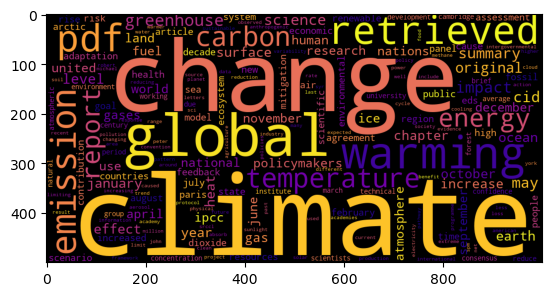

In [86]:
plt.imshow(wordcloud)
plt.show()

# Post preprocessing - Vectorization must be done

# Vectoriation ins process of converting text to matrix of numbers.

Two types of matrics are used

# 1. Document Term Matrix /Term Frequency Inverse 

    Documents/Sentences in Rows and words/tokens in Columns
    Doc1 - The car is driven on the road
    Doc2 - The truck is driven on the highway

    Post Preprocessubg
    Doc1 - car , driven, road
    Doc2 - truck, driven , highway

    Document Term Matrix

    token/words      - car  driven    road highway truck
    Doc1             - 1      1        1     0       0
    Doc2             - 0      1        0     1       1
   
   

# 2. Document Frequency (TFIDF) Matrix




In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
DTM=CountVectorizer(max_features=20,stop_words="english")

In [90]:
X_DTM=DTM.fit_transform(cilmatewords)

In [91]:
pd.DataFrame(X_DTM.toarray(),columns=DTM.vocabulary_).head()

,climate,change,global,temperature,warming,greenhouse,surface,impacts,emissions,energy,carbon,earth,heat,report,retrieved,january,summary,cid,original,pdf
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
sentences.head()

,sentences,sentiment
0,Climate change - WikipediaJump to contentMain ...,Positive
1,Temperatures prior to present-day global warmi...,Neutral
2,Warming since the Industrial Revolution .,Neutral
3,.,Neutral
4,Differences by region .,Neutral


In [95]:
X_DTM_sentence=DTM.fit_transform(sentences['sentences'])

In [96]:
pd.DataFrame(X_DTM_sentence.toarray(),columns=DTM.vocabulary_).head()  # it has single words in the data frame

,climate,change,global,warming,greenhouse,emissions,energy,carbon,ipcc,report,science,retrieved,ar,wg,et,al,bibcode,doi,pp,pdf
0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
X_DTM_sentence.shape # will give the tuple indicating the matrix size

(2314, 20)

In [100]:
sentences['sentences']=sentences['sentences'].str.lower()

In [101]:
DTM_New=CountVectorizer(max_features=50, stop_words="english",analyzer="word",ngram_range=(2,2)) # combine two words so see the output of the data frame below

In [102]:
X_DTM_sentence=DTM_New.fit_transform(sentences['sentences'])

In [103]:
pd.DataFrame(X_DTM_sentence.toarray(),columns=DTM_New.get_feature_names_out()).head()

,academy sciences,ar syr,ar wg,archivedfrom original,cambridge university,carbon brief,carbon dioxide,ch pp,change impacts,climate change,...,special report,sr ch,summary policymakers,technical summary,united nations,united states,university press,wg ch,wg technical,working group
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
X_DTM_sentence.shape

(2314, 50)

# 2  Term Frequency Inverse Document Frequency Matrix (TFIDF Matrix)

# TFIDF term frequency * Log(num of documents/ num of documents containing words )


   Documents/Sentences in Rows and words/tokens in Columns
    Doc1 - The car is driven on the road
    Doc2 - The truck is driven on the highway

    Post Preprocessubg
    Doc1 - car , driven, road
    Doc2 - truck, driven , highway

    Document Term Matrix

    token/words      - car  driven    road highway truck
    Doc1             - 1      1        1     0       0
    Doc2             - 0      1        0     1       1
   
   
TFIDF for car

TF of car = 1/3  = 0.33
IDF of car = log(2/1) = log(2) = 0.6931
TFIDF = 0.33 * 0.6931 = 0.2310


TFIDF for Driven

TF of Driven = 1/3  *  1/3 = 0.1089
IDF of Driven = log(2/2) = log(1) = 0
TFIDF of driven  = 0.1089*0=0


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
tfidf=TfidfVectorizer(max_features=20,stop_words="english",ngram_range=(2,2))

In [122]:
X_tfdif=tfidf.fit_transform(sentences['sentences'])

In [123]:
pd.DataFrame(X_tfdif.toarray(),columns=tfidf.vocabulary_).head()

,climate change,global warming,greenhouse gases,carbon dioxide,greenhouse gas,sea level,united nations,panel climate,ipcc ar,ar wg,summary policymakers,et al,issn cid,wg ch,archivedfrom original,ipcc sr,sr ch,pmc pmid,carbon brief,pdf ipcc
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
X_tfdif.shape

(2314, 20)

In [184]:
eng_stop_words=list(stopwords.words("english"))
eng_stop_words.extend("ar wg et al sr ch scid issn ipcc sr pmid cid pdf".split())
eng_stop_words.extend("january february march april may june july august september october november december".split())

In [185]:
tfidf_new=TfidfVectorizer(max_features=20,stop_words=list(eng_stop_words),ngram_range=(2,2))

In [186]:
X_tfdif_new=tfidf_new.fit_transform(sentences['sentences'])

In [187]:
pd.DataFrame(X_tfdif_new.toarray(),columns=tfidf_new.vocabulary_).head()

,climate change,global warming,greenhouse gases,carbon dioxide,fossil fuel,level rise,greenhouse gas,gas emissions,sea level,united nations,panel climate,summary policymakers,research letters,technical summary,high confidence,archivedfrom original,intergovernmental panel,cambridge university,university press,carbon brief
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [188]:
X_tfidf=tfidf.fit_transform(sentences['sentences'])

In [189]:
X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out()) # remove the header out from the dataframe

In [190]:
climate_final=pd.concat([X_tfidf,sentences['sentiment']],axis=1)

In [191]:
climate_final=climate_final[climate_final['sentiment']!="Neutral"]

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
y=LabelEncoder().fit_transform(climate_final['sentiment']) #dummy encode

In [194]:
X=climate_final.drop('sentiment',axis=1)

In [195]:
from sklearn.linear_model import LogisticRegression

In [196]:
logitmodel=LogisticRegression().fit(X,y)

In [197]:
logitmodel.score(X,y)

0.6782752902155887

In [198]:
logitmodel_pred=logitmodel.predict(X)

In [199]:
pd.crosstab(y,logitmodel_pred)

col_0,0,1
row_0,,
0,3,192
1,2,406
